In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Değişkenler
* Sayfa toplam beğenileri: gönderi yayına girdiğinde sayfanın kaç beğenisi vardı?
* Tür: ne tür bir gönderi (video, bağlantı, durum, fotoğraf)
* Kategori: emin değilim, 3 seviye
* Ay Sonrası
* Hafta İçi Sonrası
* Gönderi Saati
* Paralı
* beğenmek
* paylaşmak
* Yorum
* toplam etkileşimler
* Gönderi ölçümleri (yayınlandıktan sonra kaydedilir, yalnızca EDA)

## verinin yüklenmesi

In [108]:
veri=pd.read_csv("dataset_Facebook.csv",delimiter=";")
veri.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [109]:
veri.dtypes

Page total likes                                                         int64
Type                                                                    object
Category                                                                 int64
Post Month                                                               int64
Post Weekday                                                             int64
Post Hour                                                                int64
Paid                                                                   float64
Lifetime Post Total Reach                                                int64
Lifetime Post Total Impressions                                          int64
Lifetime Engaged Users                                                   int64
Lifetime Post Consumers                                                  int64
Lifetime Post Consumptions                                               int64
Lifetime Post Impressions by people who have liked y

In [110]:
veri.shape


(500, 19)

In [111]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

* Elimizdeki sütunlarımızda hiç Nan değer var mı diye bakmamız lazım varsa da ona göre işlemler yapmamız gerekir çünkü daha sonra yapacağımız işlemlerde bizim için etkili olmaması için düzeltmezsek modelimizi bozabilir


In [112]:
columns = [
    'Page total likes',
    'Category',
    'Post Month',
    'Post Weekday',
    'Post Hour',
    'Paid',
    'Lifetime Post Total Reach',
    'Lifetime Post Total Impressions',
    'Lifetime Engaged Users',
    'Lifetime Post Consumers',
    'Lifetime Post Consumptions',
    'Lifetime Post Impressions by people who have liked your Page',
    'Lifetime Post reach by people who like your Page',
    'Lifetime People who have liked your Page and engaged with your post',
    'comment',
    'like',
    'share',
    'Total Interactions'
]

def eksik_bilgi(dizi):
    for i in dizi:
        sayi=veri[i].isnull().sum()
        print("{} kategorisindeki eksik bilgi(Nan değer) sayısı:{} ".format(i,sayi))

eksik_bilgi(columns) 

Page total likes kategorisindeki eksik bilgi(Nan değer) sayısı:0 
Category kategorisindeki eksik bilgi(Nan değer) sayısı:0 
Post Month kategorisindeki eksik bilgi(Nan değer) sayısı:0 
Post Weekday kategorisindeki eksik bilgi(Nan değer) sayısı:0 
Post Hour kategorisindeki eksik bilgi(Nan değer) sayısı:0 
Paid kategorisindeki eksik bilgi(Nan değer) sayısı:1 
Lifetime Post Total Reach kategorisindeki eksik bilgi(Nan değer) sayısı:0 
Lifetime Post Total Impressions kategorisindeki eksik bilgi(Nan değer) sayısı:0 
Lifetime Engaged Users kategorisindeki eksik bilgi(Nan değer) sayısı:0 
Lifetime Post Consumers kategorisindeki eksik bilgi(Nan değer) sayısı:0 
Lifetime Post Consumptions kategorisindeki eksik bilgi(Nan değer) sayısı:0 
Lifetime Post Impressions by people who have liked your Page kategorisindeki eksik bilgi(Nan değer) sayısı:0 
Lifetime Post reach by people who like your Page kategorisindeki eksik bilgi(Nan değer) sayısı:0 
Lifetime People who have liked your Page and engaged wit

* yazdığımız eksik_bilgi fonksiyonu sayesinde eksik bilgi (Nan değer ) sayısını kontrol ettik ve abzı kolonlarda  Nan değeri olduğunu görüyoruz bundan dolayı o Nan değeri doldurmamız lazım ama çok büyük bir veri eksikliği olsaydı silmemiz daha iyi olurdu çünkü veri doğruluğu bozulurdu


In [113]:

veri['like'].fillna(0,inplace=True)
veri['share'].fillna(0,inplace=True)
veri['Paid'].fillna(0,inplace=True)

In [114]:
eksik_bilgi(columns) 

Page total likes kategorisindeki eksik bilgi(Nan değer) sayısı:0 
Category kategorisindeki eksik bilgi(Nan değer) sayısı:0 
Post Month kategorisindeki eksik bilgi(Nan değer) sayısı:0 
Post Weekday kategorisindeki eksik bilgi(Nan değer) sayısı:0 
Post Hour kategorisindeki eksik bilgi(Nan değer) sayısı:0 
Paid kategorisindeki eksik bilgi(Nan değer) sayısı:0 
Lifetime Post Total Reach kategorisindeki eksik bilgi(Nan değer) sayısı:0 
Lifetime Post Total Impressions kategorisindeki eksik bilgi(Nan değer) sayısı:0 
Lifetime Engaged Users kategorisindeki eksik bilgi(Nan değer) sayısı:0 
Lifetime Post Consumers kategorisindeki eksik bilgi(Nan değer) sayısı:0 
Lifetime Post Consumptions kategorisindeki eksik bilgi(Nan değer) sayısı:0 
Lifetime Post Impressions by people who have liked your Page kategorisindeki eksik bilgi(Nan değer) sayısı:0 
Lifetime Post reach by people who like your Page kategorisindeki eksik bilgi(Nan değer) sayısı:0 
Lifetime People who have liked your Page and engaged wit

# EDA

* * heatmap yani kolerasyon grafiğine bakalım


<Axes: >

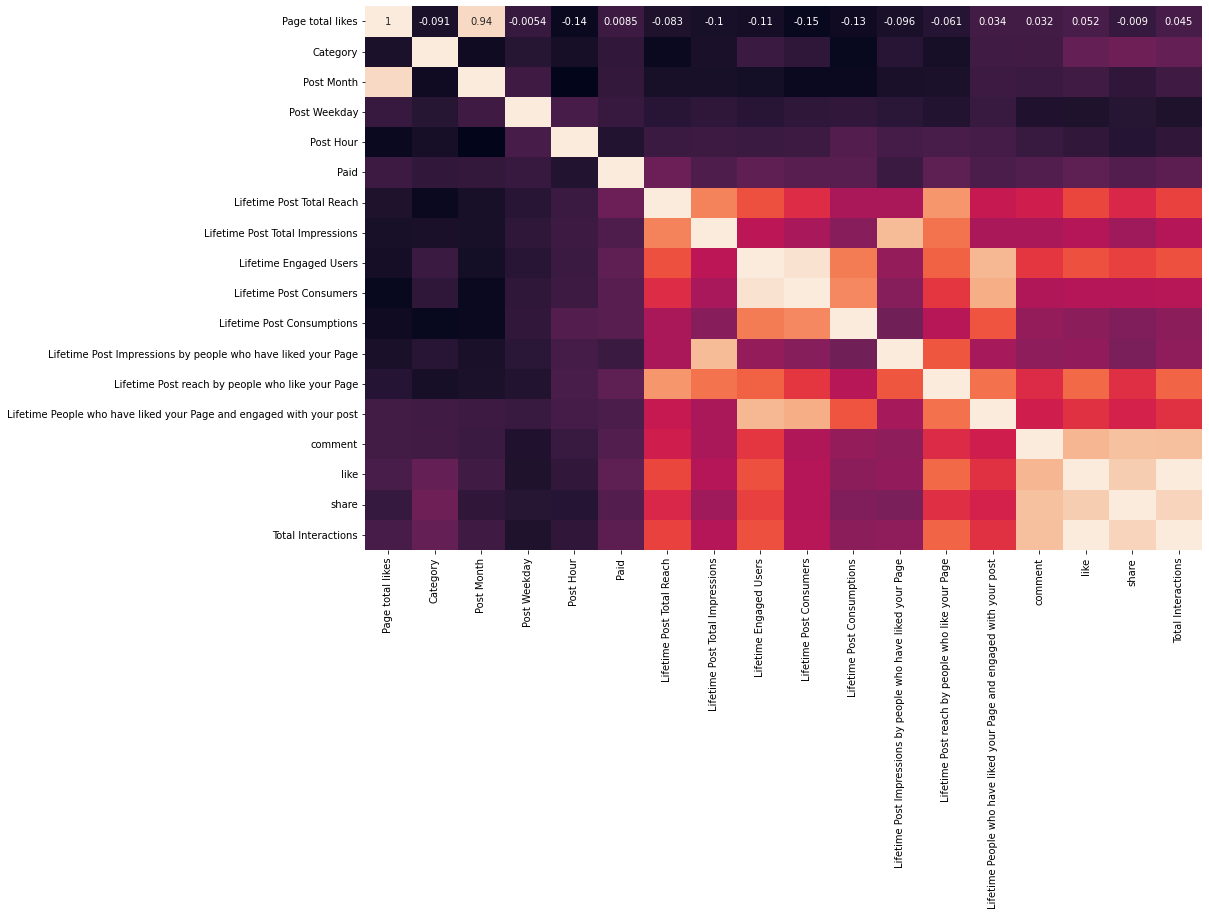

In [115]:
plt.figure(figsize=(15,10))
sns.heatmap(veri.corr(),annot=True,cbar=False)

* * aylara göre etkileşim nasıl değişiyor diye analiz etmek istedim 


In [116]:
interactions_by_month= veri.groupby(['Post Month'])['Total Interactions'].sum().reset_index()
interactions_by_month 

,Post Month,Total Interactions
0,1,4015
1,2,6293
2,3,3494
3,4,10876
4,5,9483
5,6,7728
6,7,17082
7,8,7663
8,9,10026
9,10,10974


* * ve bunları grafiğe döktüm

Text(0.5, 1.0, 'aylara göre etkileşim')

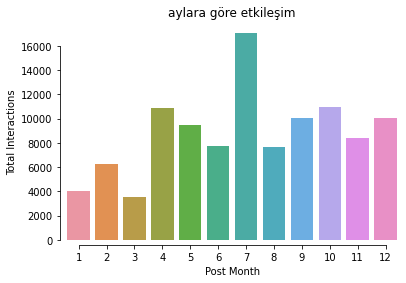

In [117]:
sns.barplot(x='Post Month', y='Total Interactions', data=interactions_by_month)
sns.despine(offset = 5, trim = True)
plt.title("aylara göre etkileşim")


* * günlere göre etkileşim 

In [118]:
interactions_by_day= veri.groupby(['Post Weekday'])['Total Interactions'].sum().reset_index()
interactions_by_day

,Post Weekday,Total Interactions
0,1,16118
1,2,13230
2,3,18417
3,4,18758
4,5,13756
5,6,13187
6,7,12594


Text(0.5, 1.0, 'haftanın günlerine göre etkileşim')

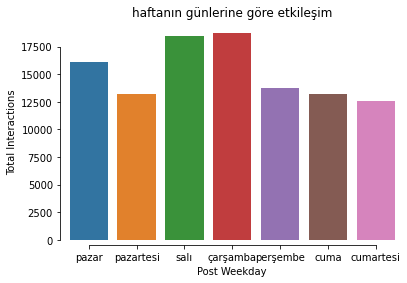

In [119]:
sns.barplot(x='Post Weekday', y='Total Interactions', data=interactions_by_day)
handles = ["pazar", "pazartesi", "salı", "çarşamba", "perşembe", "cuma",'cumartesi']
labels = [0,1,2,3,4,5,6]
plt.xticks(labels, handles,rotation=45)
sns.despine(offset = 5, trim = True)
plt.title("haftanın günlerine göre etkileşim")

* * gün saatine göre etkileşim

Text(0.5, 1.0, 'saate göre etkileşim')

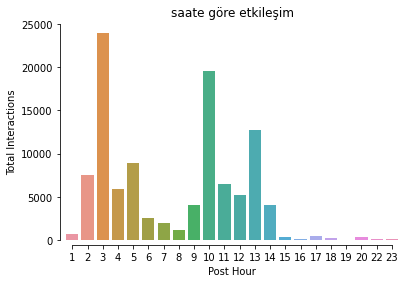

In [120]:
interactions_by_hour= veri.groupby(['Post Hour'])['Total Interactions'].sum().reset_index()
sns.barplot(x='Post Hour', y='Total Interactions', data=interactions_by_hour)
sns.despine(offset = 5, trim = True)
plt.title("saate göre etkileşim")

*  * Veri setine göre etkileşimlerin çoğunun 3. saatte olduğunu görebiliyoruz. Ancak sabaha karşı 3.00 civarında herkesin uyanık kalması pek olası değildir. Daha fazla değerlendirme yapmak için gönderi sayısını saat bazında da görelim..

* * hafta içi yayınlanan gönderilerin üerctli ve ücretsiz olarak etkileşimleri

Text(0.5, 1.0, 'Etkileşimlerin Hafta İçi Yayınlanan Günlere Göre Dağılımı')

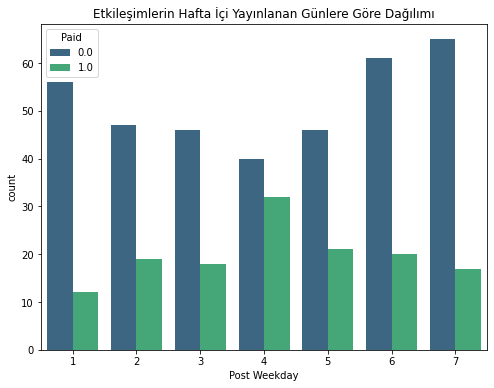

In [121]:
plt.figure(figsize=(8,6))
sns.countplot(x='Post Weekday',hue='Paid',data=veri,palette='viridis')
plt.title("Etkileşimlerin Hafta İçi Yayınlanan Günlere Göre Dağılımı")

* * Burada ücretli gönderilerin ücretsiz gönderilere göre daha fazla etkileşim aldığını görebiliriz

*  Sayfa Beğenileri ve Gönderiler

c:\Users\semih\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Gönderi başına beğeni dağılımı')

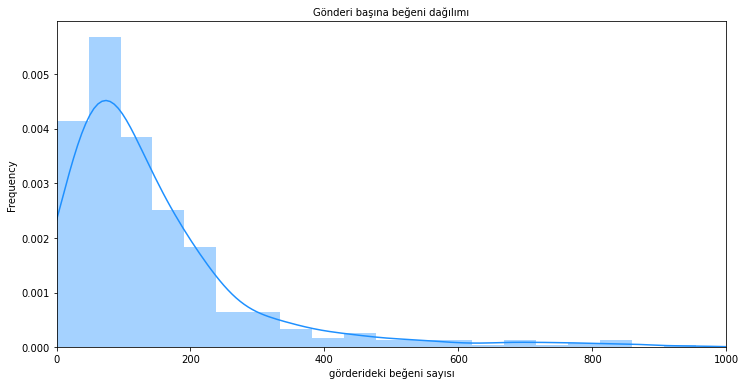

In [122]:
plt.figure(figsize=(12,6))
sns.distplot(veri[veri['like']<1000]['like'],bins=20,color='dodgerblue')
plt.xlim(0,1000)
plt.xlabel("görderideki beğeni sayısı",fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.title('Gönderi başına beğeni dağılımı',fontsize=10)


Text(0.5, 1.0, 'Toplam Sayfa Beğenilerinin Dağılımı')

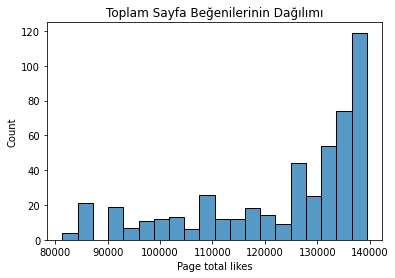

In [123]:
sns.histplot(veri['Page total likes'],bins=20)
plt.title("Toplam Sayfa Beğenilerinin Dağılımı")

* Sayfa beğenisi ile beğeni gönderisi arasındaki ilişki

c:\Users\semih\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, '# Sayfa Beğenisi vs. # Gönderi Beğenisi')

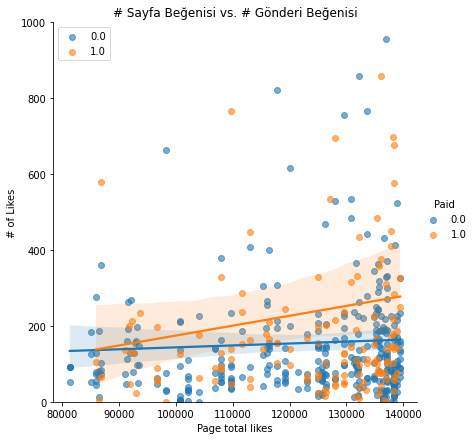

In [124]:
sns.lmplot(x='Page total likes',y='like',
           hue='Paid',data=veri,fit_reg=True,
          scatter_kws={'alpha':0.6},size=(6))
plt.legend()
plt.ylim(0,1000)
plt.ylabel("# of Likes")
plt.title('# Sayfa Beğenisi vs. # Gönderi Beğenisi')
#plt.savefig('pageLikeScatter.png', bbox_inches='tight

* Ücretli gönderiler ile sayfa beğenileri arasında hafif bir pozitif eğilim var ve ücretsiz gönderiler ile sayfa beğenileri arasında kayda değer bir eğilim yok

Text(0.5, 1.0, 'Kategoriye göre toplam etkileşimler')

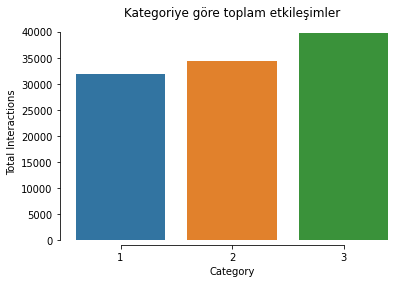

In [125]:
likes_by_category = veri.groupby(['Category'])['Total Interactions'].sum().reset_index()
sns.barplot(x='Category', y='Total Interactions', data=likes_by_category)
sns.despine(offset = 5, trim = True)
plt.title("Kategoriye göre toplam etkileşimler")

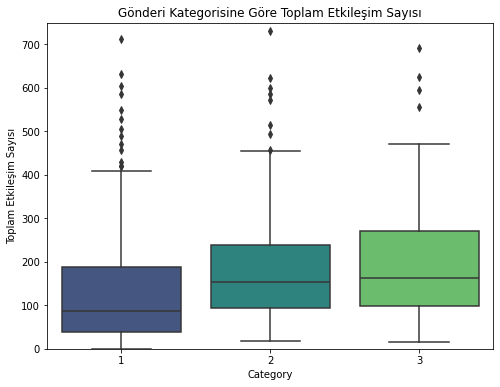

In [126]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Category',y='Total Interactions',data=veri,palette='viridis')
plt.ylim(0,750)
plt.ylabel("Toplam Etkileşim Sayısı")
plt.title("Gönderi Kategorisine Göre Toplam Etkileşim Sayısı")
plt.savefig('catBox.png', bbox_inches='tight')

Text(0.5, 1.0, 'Kategoriye ve Gönderilerin Ücretli Olup Olmadığına Göre Gönderi Başına Toplam Etkileşim')

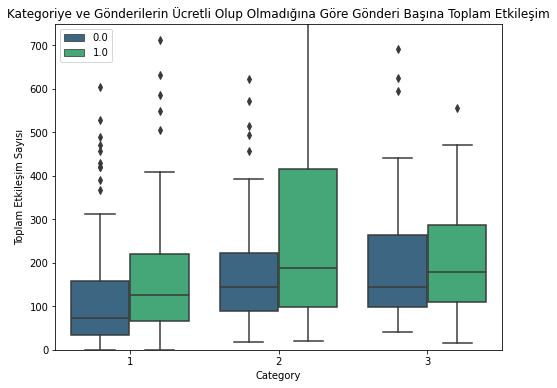

In [127]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Category',y='Total Interactions',data=veri,hue='Paid',palette='viridis')
plt.ylim(0,750)
plt.ylabel("Toplam Etkileşim Sayısı")
plt.legend(loc='upper left')
plt.title("Kategoriye ve Gönderilerin Ücretli Olup Olmadığına Göre Gönderi Başına Toplam Etkileşim")

* Kategori 2 ve 3 benzer performans sergilerken Kategori 1 en kötü performansı gösterdi
Ücretli Kategori 1 gönderileri en büyük artışı gördü, ardından 2 ve ardından 3 gönderi geldi.

Text(0.5, 1.0, 'Türlere göre etkileşim')

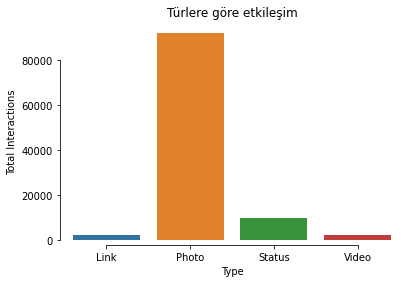

In [128]:
interactions_by_Type = veri.groupby(['Type'])['Total Interactions'].sum().reset_index()
sns.barplot(x='Type', y='Total Interactions', data=interactions_by_Type)
sns.despine(offset = 5, trim = True)
plt.title("Türlere göre etkileşim")

Text(0, 0.5, 'Posts')

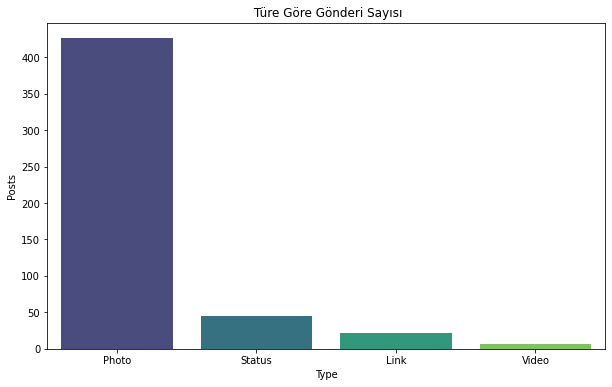

In [129]:
plt.figure(figsize=(10,6))
sns.countplot(x='Type',data=veri,palette='viridis')
plt.title(" Türe Göre Gönderi Sayısı")
plt.ylabel("Posts")

Text(0, 0.5, 'Toplam Etkileşim Sayısı')

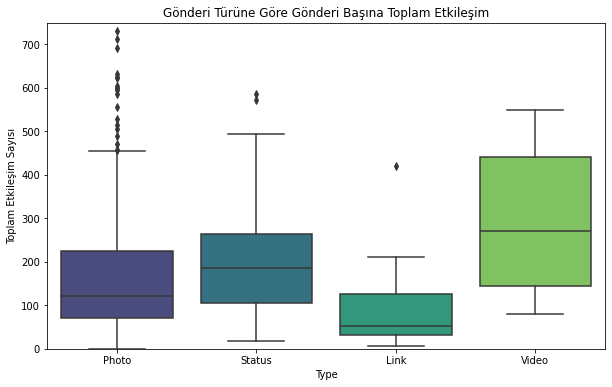

In [130]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Type',y='Total Interactions',data=veri,palette='viridis')
plt.ylim(0,750)
plt.title("Gönderi Türüne Göre Gönderi Başına Toplam Etkileşim")
plt.ylabel("Toplam Etkileşim Sayısı")


* Fotoğraf gönderilerinin sayısı daha fazla olduğu için en çok fotoğraf gönderileri beğeniliyor.
Video gönderileri en yüksek ortalamaya, medyana ve yüzdelik dilimlere sahiptir.
Fotoğraf gönderileri en geniş aralığa sahiptir; bu, hareketsizliklerin yayınlanan fotoğrafa dayalı olduğu anlamına gelir.
bağlantılar en az etkileşimle en kötü performansı gösterir.

### Hocamızın bizden istediklerine göre kullanacağımız colums'ları alacapız diğerlerini kullanmayacağımız için drop yani silme işlemi yapacağız.

In [131]:
veri.drop(veri.iloc[:, 7:18], inplace = True, axis = 1)
veri 

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Total Interactions
0,139441,Photo,2,12,4,3,0.0,100
1,139441,Status,2,12,3,10,0.0,164
2,139441,Photo,3,12,3,3,0.0,80
3,139441,Photo,2,12,2,10,1.0,1777
4,139441,Photo,2,12,2,3,0.0,393
...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,84
496,81370,Photo,2,1,5,8,0.0,75
497,81370,Photo,1,1,5,2,0.0,115
498,81370,Photo,3,1,4,11,0.0,136


* yaptığımız işlemde de gördüğümüz gibi nan olan değeri 0 değeri ile doldurma işlemi yaptık ve veri setimiz de eksik değer kalmamış oldu

* bazı veriler kategorik veriler bu  verileri sayısal değere çevirmemiz gerekecek çünkü lineer regression yapmamız için sayısal değer elde etmemiz lazım 
    * haftanın günleri burada sayısal olarak belirtilmiş ama bunların gerçek değerlerini belirleyip bunların verideki etkilerine bakarken bize yardımcı olmasını sağlayacağız 

In [132]:
def günleri_cevirme(a):
    if a ==1:
        return "pazar"
    elif a ==2:
        return "pazartesi"
    elif a == 3:
        return "salı" 
    elif a ==4:
        return "Çarşamba"
    elif a ==5 :
        return "Perşembe "
    elif a==6:
        return "Cuma"
    elif a==7:
        return "Cumartesi"

veri["Weekday"] = veri["Post Weekday"].apply(lambda a: günleri_cevirme(a)) #yukarıdaki fonksiyonu kullarak burada post weekday sutununda bulunan 1-7 arasındaki kategorik sayıların hangi güne denk geldiğini yapmış olduk ve bunu yeni sütuna ekledik


* * şimdi yeni oluşturmuş olduğumuz sütunu da get_dummies  ile gün adına denk gelen sayılar için tek tek sütün yapacak şekilde böleceğiz 

In [133]:
G_veri=pd.get_dummies(veri["Weekday"])

In [134]:
G_veri

,Cuma,Cumartesi,Perşembe,pazar,pazartesi,salı,Çarşamba
0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
495,0,1,0,0,0,0,0
496,0,0,1,0,0,0,0
497,0,0,1,0,0,0,0
498,0,0,0,0,0,0,1


* * şimdi bu günlere ait bu veriyi büyük verimize concat fonksiyonu ile ekleyelim

In [135]:
veri=pd.concat([veri,G_veri],axis=1)

In [136]:
veri

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Total Interactions,Weekday,Cuma,Cumartesi,Perşembe,pazar,pazartesi,salı,Çarşamba
0,139441,Photo,2,12,4,3,0.0,100,Çarşamba,0,0,0,0,0,0,1
1,139441,Status,2,12,3,10,0.0,164,salı,0,0,0,0,0,1,0
2,139441,Photo,3,12,3,3,0.0,80,salı,0,0,0,0,0,1,0
3,139441,Photo,2,12,2,10,1.0,1777,pazartesi,0,0,0,0,1,0,0
4,139441,Photo,2,12,2,3,0.0,393,pazartesi,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,84,Cumartesi,0,1,0,0,0,0,0
496,81370,Photo,2,1,5,8,0.0,75,Perşembe,0,0,1,0,0,0,0
497,81370,Photo,1,1,5,2,0.0,115,Perşembe,0,0,1,0,0,0,0
498,81370,Photo,3,1,4,11,0.0,136,Çarşamba,0,0,0,0,0,0,1


In [137]:
# günde yaptığımız işlemleri şimde de saat ve ay sütununa göre  yapacağız ama burada ayırma değil detaylandırma yapacağız modelimiz daha kolay öğrenme yapabilsemsi için

hours = list(range(0,18))
for i in hours:
    hours[i] = str(hours[i])
    hours[i]='Hour_'+ hours[i]

In [138]:
S_veri = pd.get_dummies(veri['Post Hour'],prefix='sa_')
veri = pd.concat([veri,S_veri],axis=1)

In [139]:
A_veri = pd.get_dummies(veri['Post Month'],prefix='Ay')
veri = pd.concat([veri,A_veri],axis=1)

In [140]:
veri

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Total Interactions,Weekday,Cuma,...,Ay_3,Ay_4,Ay_5,Ay_6,Ay_7,Ay_8,Ay_9,Ay_10,Ay_11,Ay_12
0,139441,Photo,2,12,4,3,0.0,100,Çarşamba,0,...,0,0,0,0,0,0,0,0,0,1
1,139441,Status,2,12,3,10,0.0,164,salı,0,...,0,0,0,0,0,0,0,0,0,1
2,139441,Photo,3,12,3,3,0.0,80,salı,0,...,0,0,0,0,0,0,0,0,0,1
3,139441,Photo,2,12,2,10,1.0,1777,pazartesi,0,...,0,0,0,0,0,0,0,0,0,1
4,139441,Photo,2,12,2,3,0.0,393,pazartesi,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,84,Cumartesi,0,...,0,0,0,0,0,0,0,0,0,0
496,81370,Photo,2,1,5,8,0.0,75,Perşembe,0,...,0,0,0,0,0,0,0,0,0,0
497,81370,Photo,1,1,5,2,0.0,115,Perşembe,0,...,0,0,0,0,0,0,0,0,0,0
498,81370,Photo,3,1,4,11,0.0,136,Çarşamba,0,...,0,0,0,0,0,0,0,0,0,0


* veride kategorik olarak bulunan Type sütununa geldik bu sütunda 3 kategori var bunları kendi içinde ayırıp tek tek sütun yapacağız bu sütunların olduğu satırda 1 yazacak olmayında da 0 yazacak ve böylece kategorik olan sütunu sayısala çevirmiş olacağız

In [141]:
veri['Video'] = pd.get_dummies(veri['Type'])['Video']
veri['Status'] = pd.get_dummies(veri['Type'])['Status']
veri['Photo'] = pd.get_dummies(veri['Type'])['Photo']

* 3 tür olan kategoriyi de aynı işlemi uyguluyoruz


In [142]:
veri['Category_1'] = pd.get_dummies(veri['Category'])[1]
veri['Category_2'] = pd.get_dummies(veri['Category'])[2]
veri['Category_3'] = pd.get_dummies(veri['Category'])[3]

In [143]:
veri

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Total Interactions,Weekday,Cuma,...,Ay_9,Ay_10,Ay_11,Ay_12,Video,Status,Photo,Category_1,Category_2,Category_3
0,139441,Photo,2,12,4,3,0.0,100,Çarşamba,0,...,0,0,0,1,0,0,1,0,1,0
1,139441,Status,2,12,3,10,0.0,164,salı,0,...,0,0,0,1,0,1,0,0,1,0
2,139441,Photo,3,12,3,3,0.0,80,salı,0,...,0,0,0,1,0,0,1,0,0,1
3,139441,Photo,2,12,2,10,1.0,1777,pazartesi,0,...,0,0,0,1,0,0,1,0,1,0
4,139441,Photo,2,12,2,3,0.0,393,pazartesi,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,84,Cumartesi,0,...,0,0,0,0,0,0,1,0,0,1
496,81370,Photo,2,1,5,8,0.0,75,Perşembe,0,...,0,0,0,0,0,0,1,0,1,0
497,81370,Photo,1,1,5,2,0.0,115,Perşembe,0,...,0,0,0,0,0,0,1,1,0,0
498,81370,Photo,3,1,4,11,0.0,136,Çarşamba,0,...,0,0,0,0,0,0,1,0,0,1


* şimde de tek tek ayırıntılı olarak yaptığımız sütunların orjinal hallerini siliyoruz 

In [144]:
veri.drop(['Category','Type','Post Month','Post Hour','Post Weekday','Weekday'], axis=1, inplace=True)

In [145]:
veri

,Page total likes,Paid,Total Interactions,Cuma,Cumartesi,Perşembe,pazar,pazartesi,salı,Çarşamba,...,Ay_9,Ay_10,Ay_11,Ay_12,Video,Status,Photo,Category_1,Category_2,Category_3
0,139441,0.0,100,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
1,139441,0.0,164,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
2,139441,0.0,80,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,139441,1.0,1777,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
4,139441,0.0,393,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,0.0,84,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
496,81370,0.0,75,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
497,81370,0.0,115,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
498,81370,0.0,136,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


* * Şimdi modelimizi train ve test olarak ayırmadan önce aykırı değer var mı yok mu diye sorgulama yapmamız gerekecektir çünkü modelimizin aklını karıştıracak değerler olsın istemiyoruz


In [146]:
veri['Total Interactions'].describe()


count     500.000000
mean      212.120000
std       380.233118
min         0.000000
25%        71.000000
50%       123.500000
75%       228.500000
max      6334.000000
Name: Total Interactions, dtype: float64

In [147]:
outlier = np.percentile(veri['Total Interactions'],90)

* * Bu sütundaki değerlerin yüzde 90'ını  hesaplamak istedim

In [148]:
outlier

409.1

In [149]:
veri = veri[veri['Total Interactions']<outlier]  


In [150]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


* * Total Interactions'taki verileri standartlaştırmak için bu kütüphaneyi kullandım 

In [151]:
likes = veri['Page total likes']
likes =likes.values.reshape(-1,1)

In [152]:
scaler.fit(likes)
veri['Page total likes'] = scaler.transform(likes)

C:\Users\semih\AppData\Local\Temp/ipykernel_10296/2435868555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri['Page total likes'] = scaler.transform(likes)


In [153]:
veri

,Page total likes,Paid,Total Interactions,Cuma,Cumartesi,Perşembe,pazar,pazartesi,salı,Çarşamba,...,Ay_9,Ay_10,Ay_11,Ay_12,Video,Status,Photo,Category_1,Category_2,Category_3
0,1.013546,0.0,100,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
1,1.013546,0.0,164,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
2,1.013546,0.0,80,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
4,1.013546,0.0,393,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
5,1.013546,0.0,186,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-2.288209,0.0,84,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
496,-2.514389,0.0,75,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
497,-2.514389,0.0,115,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
498,-2.514389,0.0,136,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


* *  EDA kısmını tamamladık Şimdi ise train ve test olarak verilerimizi ayıralım


* * Total Interactions ' a odaklandığımız için yani ona göre kıyaslama yapacağımız için y olarak onu seçiyoruz ve veri setimizden de siliyoruz

In [154]:
x = veri.drop(['Total Interactions'],axis=1).values
y = veri['Total Interactions'].values

In [155]:
y.shape

(450,)

In [156]:
y = y.reshape(-1, 1)

In [157]:
y.shape

(450, 1)

In [158]:
x.shape

(450, 49)

# Manuel olarak  eğitim yapma


In [159]:
from sklearn.model_selection import train_test_split

In [160]:
def linear_regression(x, y, learning_rate=0.001, epochs=3000, test_size=0.2, random_state=33):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)

    w = np.zeros((X_train.shape[1], 1))


    b = 0

    n_train = float(len(X_train))
    n_test = float(len(X_test))

    train_errors = []
    test_errors = []

    for i in range(epochs): 
        Y_train_pred = np.dot(X_train, w) + b
        Y_test_pred = np.dot(X_test, w) + b

        train_error = np.sum((Y_train_pred - Y_train)**2) / (2 * n_train)
        test_error = np.sum((Y_test_pred - Y_test)**2) / (2 * n_test)

        train_errors.append(train_error)
        test_errors.append(test_error)

        
        D_w = (-2/n_train) * np.dot(X_train.T, (Y_train - Y_train_pred))

        
        

        D_b = (-2/n_train) * np.sum(Y_train - Y_train_pred)
        w = w - learning_rate * D_w
        b = b - learning_rate * D_b

   # Eğitim ve test setleri için Toplam Kare Hatası SSE'yi hesaplayın
    def sse(y_true, y_pred):
        return sum((y_true - y_pred)**2) / (len(y_true))
    
    #train_sse = sse(Y_train, Y_train_pred)
    #test_sse = sse(Y_test, Y_test_pred)
    train_sse = np.sum((Y_train_pred - Y_train)**2) / (n_train)
    test_sse = np.sum((Y_test_pred - Y_test)**2) / (n_test)
    
    from sklearn.metrics import r2_score
    r2 = r2_score(Y_test, Y_test_pred) 

    return w, train_errors, test_errors, train_sse, test_sse,r2 

In [161]:
weights, train_errors, test_errors, train_sse, test_sse,r2 = linear_regression(x,y)

Weights: [[-2.72935408e-01]
 [ 1.83008502e+01]
 [ 5.33191290e+00]
 [ 4.03698447e+00]
 [ 1.01700622e+01]
 [ 2.28752059e+00]
 [ 5.81451687e+00]
 [ 9.62077877e+00]
 [ 2.73599892e+01]
 [ 4.49547301e+00]
 [ 4.42987724e+00]
 [ 1.57809784e+01]
 [ 5.79034495e-01]
 [-2.23205056e+00]
 [ 1.10054490e+00]
 [-1.59138488e+00]
 [-8.83198741e-01]
 [ 4.10761981e+00]
 [ 1.59070126e+01]
 [ 5.50373080e+00]
 [-4.63361798e-04]
 [ 1.56200620e+01]
 [ 1.71671226e+00]
 [-2.22020510e+00]
 [ 0.00000000e+00]
 [ 1.13710685e+00]
 [-1.49441435e+00]
 [ 0.00000000e+00]
 [ 2.46749881e+00]
 [ 1.44104092e-01]
 [ 5.37266987e-02]
 [ 1.82844906e+00]
 [ 1.67201535e+01]
 [-9.18823716e+00]
 [ 9.89154011e+00]
 [ 1.40588849e+01]
 [-1.05275418e+01]
 [ 6.88720165e+00]
 [ 5.50795802e+00]
 [ 1.53763909e+01]
 [-4.34416530e+00]
 [ 1.32836578e+01]
 [ 5.12747328e+00]
 [ 6.99380800e+00]
 [ 3.20762456e+01]
 [ 2.68740380e+01]
 [-1.04351838e+01]
 [ 3.52961820e+01]
 [ 3.97607668e+01]]
Eğitim Toplam Kare Hatası (SSE): 6821.379013625243
Test Top

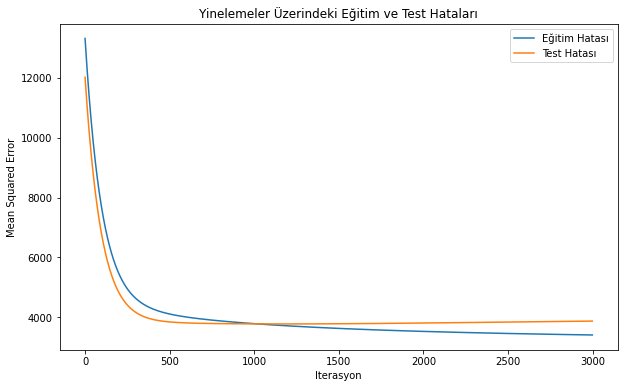

In [162]:
print("Weights:", weights)
print("Eğitim Toplam Kare Hatası (SSE):", train_sse)
print("Test Toplam Kare Hatası (SSE):", test_sse)
print("r2:{}".format(r2))
# Plotting the loss over iterations
plt.figure(figsize=(10, 6))

plt.plot(range(len(train_errors)), train_errors, label='Eğitim Hatası')
plt.plot(range(len(test_errors)), test_errors, label='Test Hatası')
plt.xlabel('Iterasyon')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Yinelemeler Üzerindeki Eğitim ve Test Hataları')
plt.show()


* * r2 ve SSE değerlerine bakacak olursak modelimiz veri setini iyi okuyamamış ve iyi tahmin yapamamış gibi gözüküyor ama veri çok karmaşıktı böyle sonuç bekliyordum

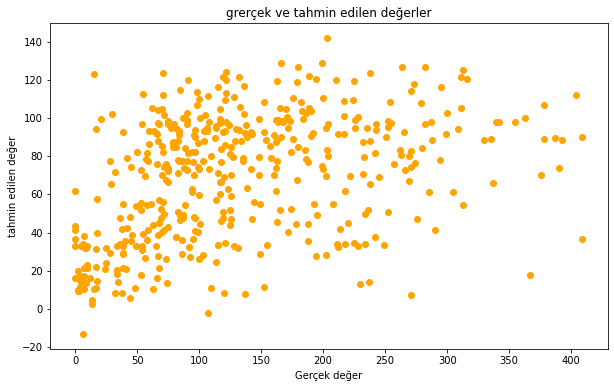

In [163]:
w, _, _, _, _, _ = linear_regression(x, y)
y_pred = np.dot(x, w)

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='orange')
plt.title('grerçek ve tahmin edilen değerler')
plt.xlabel('Gerçek değer')
plt.ylabel('tahmin edilen değer')
plt.show()


* * burada değerler birbirinde linearlik yok buda modelimizin doğruluğu düşük olduğunu gösterir

# model ile eğitim (farklı algoritmalar denenmesi)


In [164]:
x_train,x_test,y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=33)


In [165]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [166]:


linear_model = LinearRegression()

# Modeli eğit
linear_model.fit(x_train, y_train)



LinearRegression()

In [167]:
test_pred = linear_model.predict(x_test)
train_pred = linear_model.predict(x_train)

In [168]:
x.shape

(450, 49)

In [169]:
y.shape

(450, 1)

In [170]:
from sklearn.metrics import r2_score

In [171]:
test_score = r2_score(y_pred=test_pred,y_true=y_test)
train_score = r2_score(y_pred=train_pred,y_true=y_train)

print("Test için R2 Puanı",test_score)
print("train için R2 Puanı",train_score)

Test için R2 Puanı -0.05104536331152265
train için R2 Puanı 0.2789658553316129


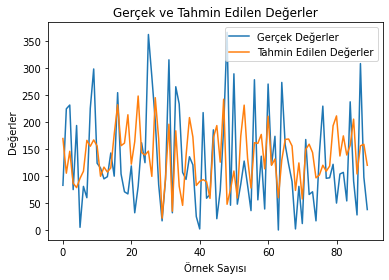

In [172]:
plt.plot(y_test, label='Gerçek Değerler')
plt.plot(test_pred, label='Tahmin Edilen Değerler')
plt.xlabel("Örnek Sayısı")
plt.ylabel("Değerler")
plt.title("Gerçek ve Tahmin Edilen Değerler")
plt.legend()
plt.show()

In [173]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

In [174]:
alphas = [0.00001,0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]


In [175]:
for a in alphas:
    model = ElasticNet(alpha=a).fit(x,y)   
    score = model.score(x, y)
    pred_y = model.predict(x)
    mse = mean_squared_error(y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0000, R2:0.24, MSE:6319.42, RMSE:79.49
Alpha:0.0010, R2:0.24, MSE:6352.60, RMSE:79.70
Alpha:0.0100, R2:0.22, MSE:6478.01, RMSE:80.49
Alpha:0.1000, R2:0.19, MSE:6792.30, RMSE:82.42
Alpha:0.3000, R2:0.15, MSE:7108.63, RMSE:84.31
Alpha:0.5000, R2:0.12, MSE:7308.82, RMSE:85.49
Alpha:0.7000, R2:0.11, MSE:7453.96, RMSE:86.34
Alpha:1.0000, R2:0.09, MSE:7612.50, RMSE:87.25


c:\Users\semih\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.414e+06, tolerance: 3.756e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\semih\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.383e+04, tolerance: 3.756e+02
  model = cd_fast.enet_coordinate_descent(


In [176]:
#elastik ağ modelinin uygulanması
model = ElasticNet(alpha=0.001).fit(x_train, y_train)

# test verilerini kullanarak tahmin alma
y_pred = model.predict(x_test)


test_score = r2_score(test_pred,y_test)

mse = mean_squared_error(y_test, y_pred)

#değerlendirmeler
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.088, MSE:8454.22, RMSE:91.95


c:\Users\semih\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.308e+04, tolerance: 3.029e+02
  model = cd_fast.enet_coordinate_descent(


In [177]:
import lightgbm as lgb


In [178]:
gbm = lgb.LGBMRegressor(num_leaves=31,
                        learning_rate=0.05,
                        n_estimators=20)
gbm.fit(x_train, y_train,
        eval_set=[(x_test, y_test)],
        eval_metric='l1',
        callbacks=[lgb.early_stopping(5)])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 360, number of used features: 33
[LightGBM] [Info] Start training from score 134.975000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

c:\Users\semih\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\semih\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:300: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


LGBMRegressor(learning_rate=0.05, n_estimators=20)

In [179]:
y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration_)

rmse_test = mean_squared_error(y_test, y_pred) ** 0.5
print('RMSE tahmini' , rmse_test)
R2_score = r2_score(y_test,y_pred)
print('R2 tahmini' , R2_score)

RMSE tahmini 86.26800705962222
R2 tahmini 0.07260421172700626


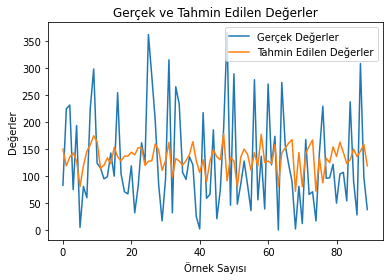

In [180]:
plt.plot(y_test, label='Gerçek Değerler')
plt.plot(y_pred, label='Tahmin Edilen Değerler')
plt.xlabel("Örnek Sayısı")
plt.ylabel("Değerler")
plt.title("Gerçek ve Tahmin Edilen Değerler")
plt.legend()
plt.show()

* Random forest denemesi


In [181]:
from sklearn.ensemble import RandomForestRegressor

In [182]:
rf = RandomForestRegressor(n_estimators=500,min_samples_split=10)
rf.fit(x_train,y_train)

c:\Users\semih\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(min_samples_split=10, n_estimators=500)

In [183]:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=500,
           n_jobs=1, oob_score=False, random_state=None, verbose=0,
           warm_start=False)


RandomForestRegressor(criterion='mse', max_features='auto',
                      min_samples_split=10, n_estimators=500, n_jobs=1)

In [184]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
import numpy as np

predicted_train = rf.predict(x_train)
predicted_test = rf.predict(x_test)

# y_test ve y_train'i 1B bir diziye dönüştür
y_test = np.ravel(y_test)
y_train = np.ravel(y_train)

test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)

print('Test verileri R-2 puanı: {}'.format(test_score))
print('Test verileri Spearman korelasyonu: {}'.format(spearman[0]))
print('Test verileri Pearson korelasyonu: {}'.format(pearson[0]))

train_score = r2_score(y_train, predicted_train)
spearmanTrain = spearmanr(y_train, predicted_train)
pearsonTrain = pearsonr(y_train, predicted_train)

print(' ')

print('Tren verileri R-2 puanı: {}'.format(train_score))
print('Eğitim verileri Spearman korelasyonu: {}'.format(spearmanTrain[0]))
print('Eğitim verileri Pearson korelasyonu: {}'.format(pearsonTrain[0]))


Test verileri R-2 puanı: 0.006089982506528591
Test verileri Spearman korelasyonu: 0.38491237107761384
Test verileri Pearson korelasyonu: 0.3087018448387405
 
Tren verileri R-2 puanı: 0.6282027659778557
Eğitim verileri Spearman korelasyonu: 0.8435547842490394
Eğitim verileri Pearson korelasyonu: 0.8261495525323477


In [185]:
RFperf = pd.DataFrame()
RFperf['skor'] = [train_score,test_score]
RFperf['tür'] = ['train','test']
RFperf

,skor,tür
0,0.628203,train
1,0.006090,test


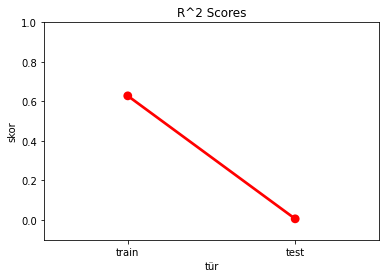

In [186]:
sns.pointplot(y=RFperf['skor'],x=RFperf['tür'],color='Red')
plt.ylim([-.1,1])
plt.title('R^2 Scores')
plt.savefig('RFScores.png',bbox_inches='tight')

* * hangi kolon daha öenli daha etkili ona bakmaya çalışalım 

In [106]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Assuming x_train is a NumPy array
# You can convert it to a DataFrame with column names
x_train_columns = [f'feature_{i}' for i in range(x_train.shape[1])]
x_train_df = pd.DataFrame(x_train, columns=x_train_columns)

# Assuming rf is your trained RandomForestClassifier
predicted_test = rf.predict(x_test)

fI = pd.DataFrame()
fI['Variable'] = x_train_df.columns
fI['Importance'] = rf.feature_importances_
fI_sorted = fI.sort_values(by='Importance', ascending=False).head(15)

# Display the sorted DataFrame
print(fI_sorted)


      Variable  Importance
0    feature_0    0.179331
46  feature_46    0.156269
40  feature_40    0.058454
8    feature_8    0.044558
3    feature_3    0.042898
1    feature_1    0.042703
18  feature_18    0.031396
43  feature_43    0.027765
35  feature_35    0.026924
21  feature_21    0.024457
32  feature_32    0.023887
41  feature_41    0.018952
17  feature_17    0.018218
11  feature_11    0.016680
7    feature_7    0.016636


* * en önemli sütun feature_0 kolonu olduğunu görmüş olduk 